In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM, Dense

In [ ]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs #no supervisado
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier

In [ ]:
data = pd.read_csv("/content/sample_data/NFLX.csv",  index_col='Date', parse_dates=['Date'])

In [ ]:
print(data.shape)
print(data.dtypes)

(1009, 5)
Open      object
High      object
Low       object
Close     object
Volume     int64
dtype: object


In [ ]:
data

,Open,High,Low,Close,Volume
Date,,,,,
2018-02-05,262.000.000,267.899.994,250.029.999,254.259.995,11896100
2018-02-06,247.699.997,266.700.012,245.000.000,265.720.001,12595800
2018-02-07,266.579.987,272.450.012,264.329.987,264.559.998,8981500
2018-02-08,267.079.987,267.619.995,250.000.000,250.100.006,9306700
2018-02-09,253.850.006,255.800.003,236.110.001,249.470.001,16906900
...,...,...,...,...,...
2022-01-31,401.970.001,427.700.012,398.200.012,427.140.015,20047500
2022-02-01,432.959.991,458.480.011,425.540.009,457.130.005,22542300
2022-02-02,448.250.000,451.980.011,426.480.011,429.480.011,14346000


In [ ]:
# Lista de columnas a convertir (excluyendo 'Date')
obj_cols = ['Open', 'High', 'Low', 'Close', 'Volume']

# Convertir las columnas a string, limpiar puntos y convertir a float
for col in obj_cols:
    data[col] = data[col].astype(str).str.replace('.', '', regex=False).astype(float)

tercera_parte = len(data) // 3
data = data.iloc[:tercera_parte]

In [ ]:
data

,Open,High,Low,Close,Volume
Date,,,,,
2018-02-05,262000000.0,267899994.0,250029999.0,254259995.0,11896100.0
2018-02-06,247699997.0,266700012.0,245000000.0,265720001.0,12595800.0
2018-02-07,266579987.0,272450012.0,264329987.0,264559998.0,8981500.0
2018-02-08,267079987.0,267619995.0,250000000.0,250100006.0,9306700.0
2018-02-09,253850006.0,255800003.0,236110001.0,249470001.0,16906900.0
...,...,...,...,...,...
2019-05-31,347220001.0,349339996.0,342920013.0,343279999.0,5023400.0
2019-06-03,343559998.0,347660004.0,332649994.0,336630005.0,7849600.0
2019-06-04,345000000.0,353609985.0,343250000.0,353399994.0,7891600.0


In [ ]:
print(data.dtypes)

Open      float64
High      float64
Low       float64
Close     float64
Volume    float64
dtype: object


Normalizacion de datos

In [ ]:
X= np.array(data.iloc[:, [0, 1, 2, 4]])
y= np.array(data['Close'])
print('X {}\n y {}'.format(X.shape,y.shape))

X (336, 4)
 y (336,)


In [ ]:
sc = MinMaxScaler(feature_range=(0,1))
sc_x = MinMaxScaler(feature_range=(0,1))

y = y.reshape(-1, 1)
y= sc.fit_transform(y)

X= sc_x.fit_transform(X)
print(y.shape)

(336, 1)


Division de los datos

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state=40)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(268, 4) (68, 4) (268, 1) (68, 1)


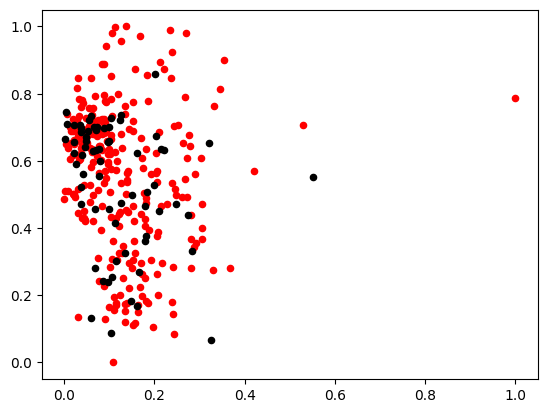

In [ ]:
plt.scatter(X_train[:,3], Y_train, c='red', s=20)
plt.scatter(X_test[:,3], Y_test, c='black', s=20)

In [ ]:
#Se ajustan las dimensiones de x
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)
print(X_train.shape)

(68, 4, 1)
(268, 4, 1)


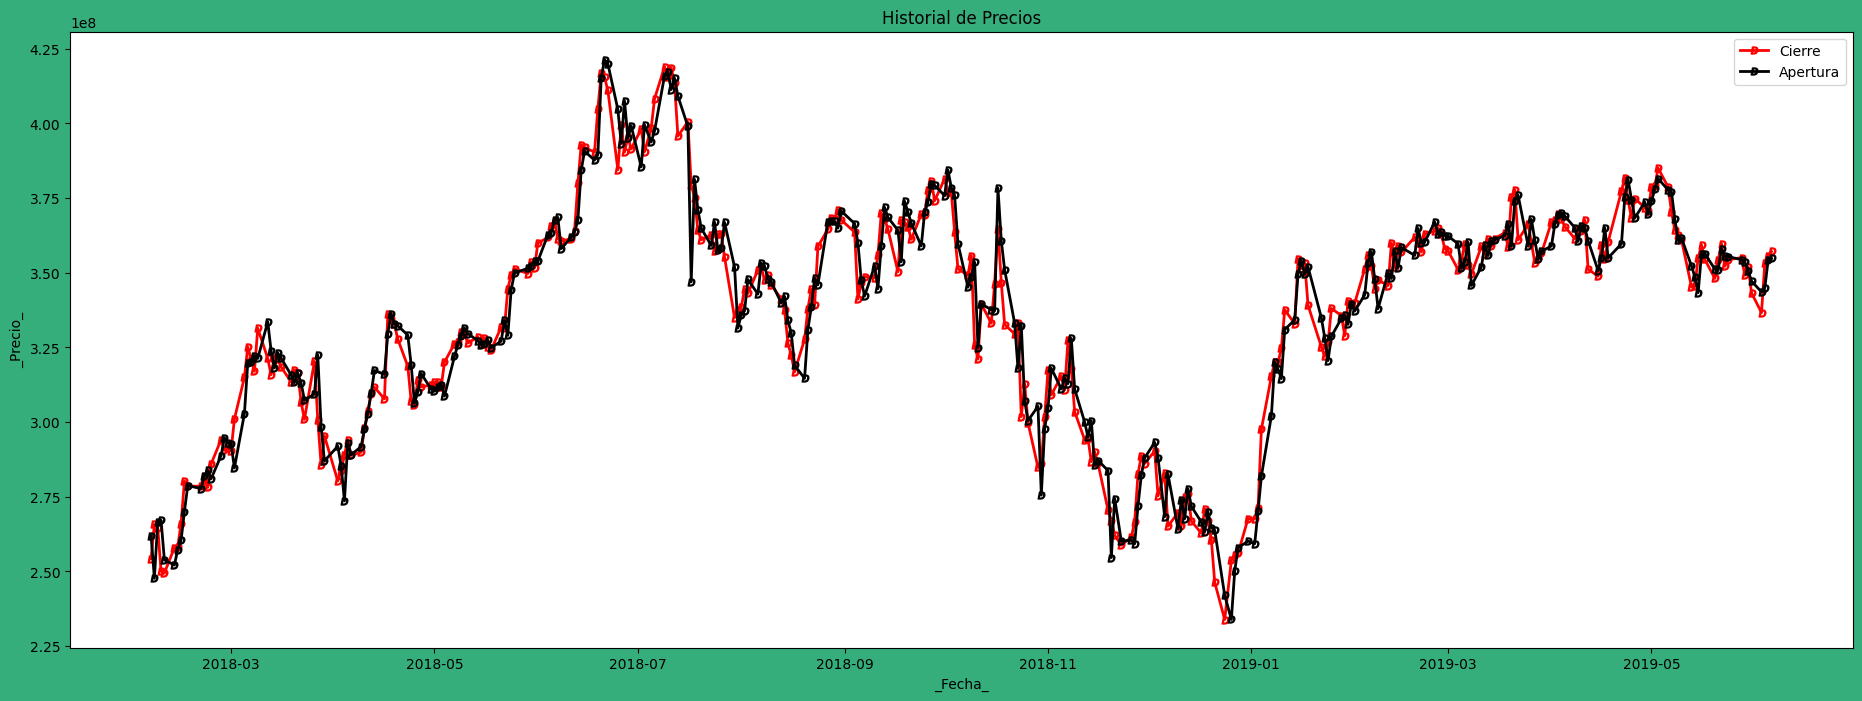

In [ ]:
#validación del historial de precios de cierre y apertura del ds
fig, ax = plt.subplots(1, 1, figsize=(23, 8))
fig.set_facecolor('#36AE7C')
ax.plot(data['Close'], marker="$D$", markersize=5, linewidth=2, linestyle='solid', color="#FF0000")  # Color rojo
ax.plot(data['Open'], marker = "$D$",markersize=5,linewidth=2,linestyle='solid' ,color="#000000")
plt.title('Historial de Precios')
plt.xlabel('_Fecha_')
plt.ylabel('_Precio_')
ax.legend(['Cierre','Apertura'])
ax.set_facecolor("#ffffff")

plt.show()

Creación de modelo

In [ ]:
modelo = Sequential()
modelo.add(LSTM(60,activation = 'relu', return_sequences=True, input_shape=(X_train.shape[1],1)))
modelo.add(LSTM(60,activation = 'relu', return_sequences=True))
modelo.add(LSTM(80))
modelo.add(Dense(40))
modelo.add(Dense(1))

modelo.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                        │ (None, 4, 60)               │          14,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 4, 60)               │          29,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 80)                  │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 40)                  │           3,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              41 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 92,321 (360.63 KB)

 Trainable params: 92,321 (360.63 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
modelo

<Sequential name=sequential, built=True>

In [ ]:
modelo.compile(optimizer='adam', loss='mean_squared_error')

Entrenamiento de modelo

In [ ]:
modelo.fit(X_train,Y_train, batch_size=10, epochs=60)

Epoch 1/60
27/27 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 0.1779
Epoch 2/60
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0297
Epoch 3/60
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0137
Epoch 4/60
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0022
Epoch 5/60
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0015
Epoch 6/60
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0012
Epoch 7/60
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0013
Epoch 8/60
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0013
Epoch 9/60
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0013
Epoch 10/60
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0011
Epoch 11/60
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0012
Epoch 12/60
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0011
Epoch 13/60
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0012
Epoch 14/60
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0014
Epoch 15/60
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0012
Epoch 1

Realizar predicciones y aplicar metricas

In [ ]:
from sklearn.metrics import mean_squared_error
predicciones = modelo.predict(X_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [ ]:
from sklearn.metrics import r2_score
rmse = np.sqrt(mean_squared_error(Y_test, predicciones))

#Calcular R2
r2 = r2_score(Y_test, predicciones)
print("R2:", r2)
print("RMSE:", rmse) #un valor de RMSE bajo indica un buen ajuste del modelo,

R2: 0.9678311156565685
RMSE: 0.03321732736653308


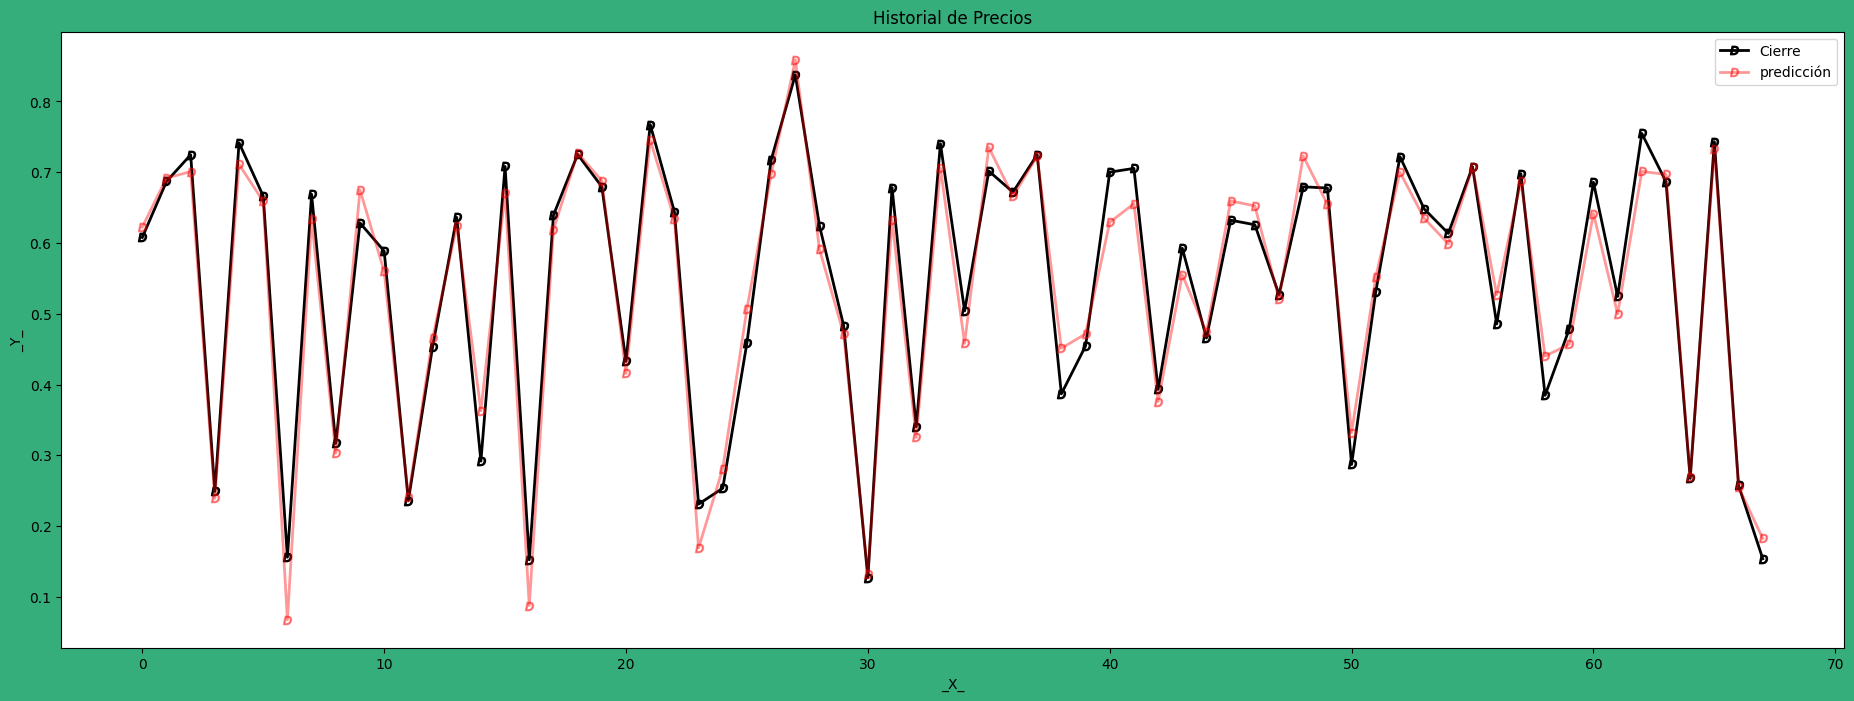

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(23, 8))
fig.set_facecolor('#36AE7C')
ax.plot(predicciones, marker = "$D$",markersize=6,linewidth=2,linestyle='solid' ,color="#000000")
ax.plot(Y_test[:,0], marker = "$D$",markersize=6,linewidth=2,linestyle='solid' ,color="#FF0000", alpha=0.4)
plt.title('Historial de Precios')
plt.xlabel('_X_')
plt.ylabel('_Y_')
ax.legend(['Cierre','predicción'])
ax.set_facecolor("#ffffff")

plt.show()

In [ ]:
import pickle
pickle.dump(modelo, open('dtmodel.pckl', 'wb'))

In [ ]:
!pip install flask flask-ngrok

In [ ]:
!pip install pyngrok
from pyngrok import ngrok
ngrok.set_auth_token("2p5h3D7mAHjd74i040YBTo9vFOK_3Lc78AR4j6vTzq2E8iWq7")

In [ ]:
from flask import Flask, request, jsonify
import pickle
import numpy as np
from pyngrok import ngrok

app = Flask(__name__)

# Ruta para predicciones
@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json()
    if not all(key in data for key in ["Open", "High", "Low", "Volume"]):
        return jsonify({"error": "Faltan parámetros de entrada"}), 400
    input_data = np.array([[data["Open"], data["High"], data["Low"], data["Volume"]]])
    prediction = model.predict(input_data)
    prediction = np.array2string(prediction)
    return jsonify({"prediction": prediction})

if __name__ == '__main__':
    modelfile = 'dtmodel.pckl'
    model = pickle.load(open(modelfile, 'rb'))
    print("LOG: serving model", model.__class__.__name__)
    public_url = ngrok.connect(5000)
    print(" * Public URL:", public_url)
    app.run()

LOG: serving model Sequential
 * Public URL: NgrokTunnel: "https://522a-34-30-249-208.ngrok-free.app" -> "http://localhost:5000"
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 668ms/step


INFO:werkzeug:127.0.0.1 - - [20/Nov/2024 00:54:21] "POST /predict HTTP/1.1" 200 -


Probar prediccion con nuevos datos

In [ ]:
datos_nuevos = np.array([[262000000, 267899994, 250029999, 11896100]])  # Ingresa los valores de Open, High, Low y Volume

datos_nuevos = np.reshape(datos_nuevos, (datos_nuevos.shape[0], datos_nuevos.shape[1], 1))

prediccion = modelo.predict(datos_nuevos)

close_predicho = prediccion[0, 0]

print("El valor predicho para la db de Netflix para el valor de Close es:", close_predicho)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
El valor predicho para la db de Netflix para el valor de Close es: 7.452193
